# ImageNet 데이터셋 검증
1. MobileNet
2. MobileNetV2
3. InceptionV3
4. Inception-ResnetV2

### import

In [1]:
import os
from datetime import datetime

#### GPU 사용여부# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

print(tf.__version__)

2.8.0


#### GPU 사용여부

In [2]:
print("GPU is", "available" if len(tf.config.list_physical_devices('GPU')) > 0 else "NOT AVAILABLE")

GPU is available


# ImageNet load

In [3]:
# Get imagenet labels
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

# Set data_dir to a read-only storage of .tar files
# Set write_dir to a w/r storage
data_dir = "C:/Users/DI Lee/Desktop/research_tensorflow/imagenet/"
write_dir = "C:/Users/DI Lee/Desktop/research_tensorflow/tf-imagenet-dirs/"

# Construct a tf.data.Dataset
download_config = tfds.download.DownloadConfig(
                      extract_dir=os.path.join(write_dir, 'extracted'),
                      manual_dir=data_dir
                  )
download_and_prepare_kwargs = {
    'download_dir': os.path.join(write_dir, 'downloaded'),
    'download_config': download_config,
}
ds = tfds.load('imagenet2012_subset', 
               data_dir=os.path.join(write_dir, 'data'),         
               split='validation', 
               shuffle_files=False, 
               download=True, 
               as_supervised=True,
               download_and_prepare_kwargs=download_and_prepare_kwargs)

# MobileNet

### Preprocess for MobileNet

image shape: (1, 224, 224, 3) label: ['European fire salamander']


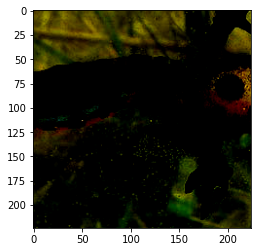

image shape: (1, 224, 224, 3) label: ['mushroom']


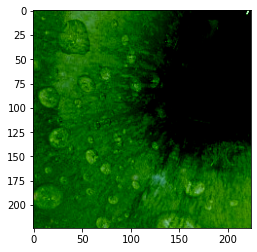

In [4]:
# Preprocess the images
def resize_with_crop_mobilenet(image, label):
    i = image
    i = tf.cast(i, tf.float32)
    i = tf.image.resize_with_crop_or_pad(i, 224, 224)
    i = tf.keras.applications.mobilenet.preprocess_input(i)
    return (i, label)

ds_MobileNet = ds.map(resize_with_crop_mobilenet)

# Plot a few
ds_MobileNet = ds_MobileNet.batch(1).prefetch(tf.data.experimental.AUTOTUNE)
for example in ds_MobileNet.take(2):
    image, label = example
    print(f'image shape: {image.shape} label: {imagenet_labels[label]}')
    plt.imshow(tf.squeeze(image, axis=0))
    plt.show()

In [5]:
model_MobileNet = tf.keras.applications.mobilenet.MobileNet(include_top=True,weights='imagenet')

model_MobileNet.trainable = False
model_MobileNet.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_MobileNet.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

## Evaluation

In [6]:
# ImageNet labels
decode_predictions = tf.keras.applications.mobilenet.decode_predictions


print("<Evaluate model>")
result_MobileNet = model_MobileNet.evaluate(ds_MobileNet)

<Evaluate model>


C:\Users\DI Lee\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


50000/50000 [==============================] - 226s 4ms/step - loss: 1.8121 - accuracy: 0.6126


In [7]:
print(dict(zip(model_MobileNet.metrics_names, result_MobileNet)))

{'loss': 1.8121269941329956, 'accuracy': 0.6126000285148621}


# MobileNetV2

### Preprocess for MobileNetV2

image shape: (1, 224, 224, 3) label: ['European fire salamander']


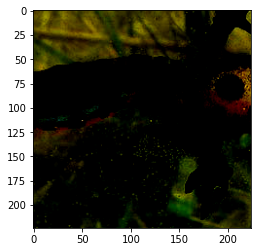

image shape: (1, 224, 224, 3) label: ['mushroom']


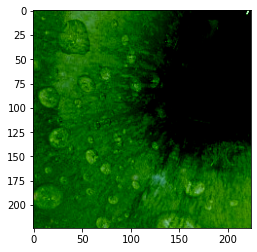

In [8]:
# Preprocess the images
def resize_with_crop_mobilenetv2(image, label):
    i = image
    i = tf.cast(i, tf.float32)
    i = tf.image.resize_with_crop_or_pad(i, 224, 224)
    i = tf.keras.applications.mobilenet_v2.preprocess_input(i)
    return (i, label)

ds_MobileNet = ds.map(resize_with_crop_mobilenetv2)

# Plot a few
ds_MobileNet = ds_MobileNet.batch(1).prefetch(tf.data.experimental.AUTOTUNE)
for example in ds_MobileNet.take(2):
    image, label = example
    print(f'image shape: {image.shape} label: {imagenet_labels[label]}')
    plt.imshow(tf.squeeze(image, axis=0))
    plt.show()

In [9]:
model_MobileNetV2 = tf.keras.applications.MobileNetV2(include_top=True,
                                                     weights='imagenet')
model_MobileNetV2.trainable = False
model_MobileNetV2.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_MobileNetV2.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

## Evaluation

In [10]:
# ImageNet labels
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions
# MobileNetV2

### Preprocess for MobileNetV2
print("<Evaluate model>")
result_MobileNetV2 = model_MobileNetV2.evaluate(ds_MobileNet)

<Evaluate model>
50000/50000 [==============================] - 322s 6ms/step - loss: 1.7855 - accuracy: 0.6155


In [11]:
print(dict(zip(model_MobileNetV2.metrics_names, result_MobileNetV2)))

{'loss': 1.785470724105835, 'accuracy': 0.6154599785804749}


# InceptionV3

### Preprocess for InceptionV3

image shape: (1, 299, 299, 3) label: ['European fire salamander']


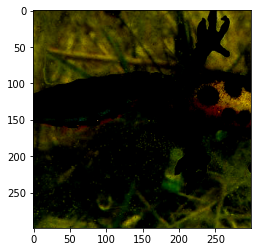

image shape: (1, 299, 299, 3) label: ['mushroom']


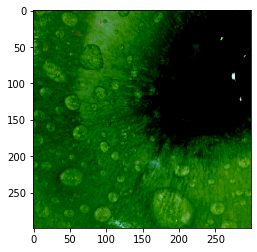

In [4]:
# Preprocess the images
def resize_with_crop_InceptionV3(image, label):
    i = image
    i = tf.cast(i, tf.float32)
    i = tf.image.resize_with_crop_or_pad(i, 299, 299)
    i = tf.keras.applications.inception_v3.preprocess_input(i)
    return (i, label)

ds_InceptionV3 = ds.map(resize_with_crop_InceptionV3)

# Plot a few
ds_InceptionV3 = ds_InceptionV3.batch(1).prefetch(tf.data.experimental.AUTOTUNE)
for example in ds_InceptionV3.take(2):
    image, label = example
    print(f'image shape: {image.shape} label: {imagenet_labels[label]}')
    plt.imshow(tf.squeeze(image, axis=0))
    plt.show()

In [5]:
model_InceptionV3 = tf.keras.applications.inception_v3.InceptionV3(include_top=True,
                                                     weights='imagenet')
model_InceptionV3.trainable = False
model_InceptionV3.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

 batch_normalization_5 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 35, 35, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 35, 35, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 35, 35, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 35, 35, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 17, 17, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 17, 17, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 17, 17, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 17, 17, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 17, 17, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 17, 17, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 8, 8, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 8, 8, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 8, 8, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

## Evaluation

In [6]:
# ImageNet labels
decode_predictions_InceptionV3 = tf.keras.applications.inception_v3.decode_predictions
# MobileNetV2

### Preprocess for MobileNetV2
print("<Evaluate model>")
result_InceptionV3 = model_InceptionV3.evaluate(ds_InceptionV3)

<Evaluate model>


C:\Users\DI Lee\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


50000/50000 [==============================] - 709s 14ms/step - loss: 1.0378 - accuracy: 0.7634


In [7]:
print(dict(zip(model_InceptionV3.metrics_names, result_InceptionV3)))

{'loss': 1.0378215312957764, 'accuracy': 0.7633799910545349}


# Inception-resnetV2

### Preprocess for Inception-resnetV2

image shape: (1, 299, 299, 3) label: ['European fire salamander']


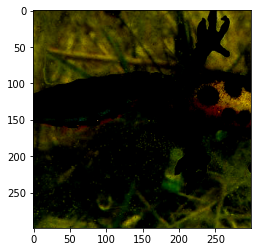

image shape: (1, 299, 299, 3) label: ['mushroom']


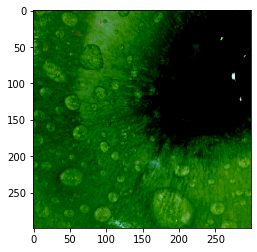

In [16]:
# Preprocess the images
def resize_with_crop_InceptionResNet(image, label):
    i = image
    i = tf.cast(i, tf.float32)
    i = tf.image.resize_with_crop_or_pad(i, 299, 299)
    i = tf.keras.applications.inception_resnet_v2.preprocess_input(i)
    return (i, label)

ds_InceptionResNet = ds.map(resize_with_crop_InceptionResNet)

# Plot a few
ds_InceptionResNet = ds_InceptionResNet.batch(1).prefetch(tf.data.experimental.AUTOTUNE)
for example in ds_InceptionResNet.take(2):
    image, label = example
    print(f'image shape: {image.shape} label: {imagenet_labels[label]}')
    plt.imshow(tf.squeeze(image, axis=0))
    plt.show()

In [17]:
model_InceptionResNetV2 = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=True,weights='imagenet')

model_InceptionResNetV2.trainable = False
model_InceptionResNetV2.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionResNetV2.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 149, 149, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 149, 149, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                               

 batch_normalization_99 (BatchN  (None, 35, 35, 96)  288         ['conv2d_99[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_101 (Batch  (None, 35, 35, 64)  192         ['conv2d_101[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_104 (Batch  (None, 35, 35, 96)  288         ['conv2d_104[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_105 (Batch  (None, 35, 35, 64)  192         ['conv2d_105[0][0]']             
 Normaliza

 activation_115 (Activation)    (None, 35, 35, 32)   0           ['batch_normalization_115[0][0]']
                                                                                                  
 conv2d_113 (Conv2D)            (None, 35, 35, 32)   10240       ['block35_1_ac[0][0]']           
                                                                                                  
 conv2d_116 (Conv2D)            (None, 35, 35, 48)   13824       ['activation_115[0][0]']         
                                                                                                  
 batch_normalization_113 (Batch  (None, 35, 35, 32)  96          ['conv2d_113[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_116 (Batch  (None, 35, 35, 48)  144         ['conv2d_116[0][0]']             
 Normaliza

                                                                                                  
 activation_118 (Activation)    (None, 35, 35, 32)   0           ['batch_normalization_118[0][0]']
                                                                                                  
 activation_120 (Activation)    (None, 35, 35, 32)   0           ['batch_normalization_120[0][0]']
                                                                                                  
 activation_123 (Activation)    (None, 35, 35, 64)   0           ['batch_normalization_123[0][0]']
                                                                                                  
 block35_3_mixed (Concatenate)  (None, 35, 35, 128)  0           ['activation_118[0][0]',         
                                                                  'activation_120[0][0]',         
                                                                  'activation_123[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_134 (Batch  (None, 35, 35, 48)  144         ['conv2d_134[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_131 (Activation)    (None, 35, 35, 32)   0           ['batch_normalization_131[0][0]']
                                                                                                  
 activation_134 (Activation)    (None, 35, 35, 48)   0           ['batch_normalization_134[0][0]']
                                                                                                  
 conv2d_130 (Conv2D)            (None, 35, 35, 32)   10240       ['block35_4_ac[0][0]']           
          

 block35_6_mixed (Concatenate)  (None, 35, 35, 128)  0           ['activation_136[0][0]',         
                                                                  'activation_138[0][0]',         
                                                                  'activation_141[0][0]']         
                                                                                                  
 block35_6_conv (Conv2D)        (None, 35, 35, 320)  41280       ['block35_6_mixed[0][0]']        
                                                                                                  
 block35_6 (Lambda)             (None, 35, 35, 320)  0           ['block35_5_ac[0][0]',           
                                                                  'block35_6_conv[0][0]']         
                                                                                                  
 block35_6_ac (Activation)      (None, 35, 35, 320)  0           ['block35_6[0][0]']              
          

 activation_152 (Activation)    (None, 35, 35, 48)   0           ['batch_normalization_152[0][0]']
                                                                                                  
 conv2d_148 (Conv2D)            (None, 35, 35, 32)   10240       ['block35_7_ac[0][0]']           
                                                                                                  
 conv2d_150 (Conv2D)            (None, 35, 35, 32)   9216        ['activation_149[0][0]']         
                                                                                                  
 conv2d_153 (Conv2D)            (None, 35, 35, 64)   27648       ['activation_152[0][0]']         
                                                                                                  
 batch_normalization_148 (Batch  (None, 35, 35, 32)  96          ['conv2d_148[0][0]']             
 Normalization)                                                                                   
          

                                                                  'block35_9_conv[0][0]']         
                                                                                                  
 block35_9_ac (Activation)      (None, 35, 35, 320)  0           ['block35_9[0][0]']              
                                                                                                  
 conv2d_163 (Conv2D)            (None, 35, 35, 32)   10240       ['block35_9_ac[0][0]']           
                                                                                                  
 batch_normalization_163 (Batch  (None, 35, 35, 32)  96          ['conv2d_163[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_163 (Activation)    (None, 35, 35, 32)   0           ['batch_normalization_163[0][0]']
          

 activation_169 (Activation)    (None, 17, 17, 384)  0           ['batch_normalization_169[0][0]']
                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 17, 17, 320)  0          ['block35_10_ac[0][0]']          
                                                                                                  
 mixed_6a (Concatenate)         (None, 17, 17, 1088  0           ['activation_166[0][0]',         
                                )                                 'activation_169[0][0]',         
                                                                  'max_pooling2d_6[0][0]']        
                                                                                                  
 conv2d_171 (Conv2D)            (None, 17, 17, 128)  139264      ['mixed_6a[0][0]']               
                                                                                                  
 batch_nor

                                )                                 'block17_2_conv[0][0]']         
                                                                                                  
 block17_2_ac (Activation)      (None, 17, 17, 1088  0           ['block17_2[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_179 (Conv2D)            (None, 17, 17, 128)  139264      ['block17_2_ac[0][0]']           
                                                                                                  
 batch_normalization_179 (Batch  (None, 17, 17, 128)  384        ['conv2d_179[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

                                )                                                                 
                                                                                                  
 conv2d_187 (Conv2D)            (None, 17, 17, 128)  139264      ['block17_4_ac[0][0]']           
                                                                                                  
 batch_normalization_187 (Batch  (None, 17, 17, 128)  384        ['conv2d_187[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_187 (Activation)    (None, 17, 17, 128)  0           ['batch_normalization_187[0][0]']
                                                                                                  
 conv2d_188 (Conv2D)            (None, 17, 17, 160)  143360      ['activation_187[0][0]']         
          

                                                                                                  
 batch_normalization_195 (Batch  (None, 17, 17, 128)  384        ['conv2d_195[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_195 (Activation)    (None, 17, 17, 128)  0           ['batch_normalization_195[0][0]']
                                                                                                  
 conv2d_196 (Conv2D)            (None, 17, 17, 160)  143360      ['activation_195[0][0]']         
                                                                                                  
 batch_normalization_196 (Batch  (None, 17, 17, 160)  480        ['conv2d_196[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 activation_203 (Activation)    (None, 17, 17, 128)  0           ['batch_normalization_203[0][0]']
                                                                                                  
 conv2d_204 (Conv2D)            (None, 17, 17, 160)  143360      ['activation_203[0][0]']         
                                                                                                  
 batch_normalization_204 (Batch  (None, 17, 17, 160)  480        ['conv2d_204[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_204 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_204[0][0]']
                                                                                                  
 conv2d_20

 conv2d_212 (Conv2D)            (None, 17, 17, 160)  143360      ['activation_211[0][0]']         
                                                                                                  
 batch_normalization_212 (Batch  (None, 17, 17, 160)  480        ['conv2d_212[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_212 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_212[0][0]']
                                                                                                  
 conv2d_210 (Conv2D)            (None, 17, 17, 192)  208896      ['block17_10_ac[0][0]']          
                                                                                                  
 conv2d_213 (Conv2D)            (None, 17, 17, 192)  215040      ['activation_212[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_220 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_220[0][0]']
                                                                                                  
 conv2d_218 (Conv2D)            (None, 17, 17, 192)  208896      ['block17_12_ac[0][0]']          
                                                                                                  
 conv2d_221 (Conv2D)            (None, 17, 17, 192)  215040      ['activation_220[0][0]']         
                                                                                                  
 batch_normalization_218 (Batch  (None, 17, 17, 192)  576        ['conv2d_218[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_226 (Conv2D)            (None, 17, 17, 192)  208896      ['block17_14_ac[0][0]']          
                                                                                                  
 conv2d_229 (Conv2D)            (None, 17, 17, 192)  215040      ['activation_228[0][0]']         
                                                                                                  
 batch_normalization_226 (Batch  (None, 17, 17, 192)  576        ['conv2d_226[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_229 (Batch  (None, 17, 17, 192)  576        ['conv2d_229[0][0]']             
 Normalization)                                                                                   
          

 conv2d_237 (Conv2D)            (None, 17, 17, 192)  215040      ['activation_236[0][0]']         
                                                                                                  
 batch_normalization_234 (Batch  (None, 17, 17, 192)  576        ['conv2d_234[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_237 (Batch  (None, 17, 17, 192)  576        ['conv2d_237[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_234 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_234[0][0]']
                                                                                                  
 activatio

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_245 (Batch  (None, 17, 17, 192)  576        ['conv2d_245[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_242 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_242[0][0]']
                                                                                                  
 activation_245 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_245[0][0]']
                                                                                                  
 block17_19_mixed (Concatenate)  (None, 17, 17, 384)  0          ['activation_242[0][0]',         
          

 activation_250 (Activation)    (None, 17, 17, 256)  0           ['batch_normalization_250[0][0]']
                                                                                                  
 activation_252 (Activation)    (None, 17, 17, 256)  0           ['batch_normalization_252[0][0]']
                                                                                                  
 activation_255 (Activation)    (None, 17, 17, 288)  0           ['batch_normalization_255[0][0]']
                                                                                                  
 conv2d_251 (Conv2D)            (None, 8, 8, 384)    884736      ['activation_250[0][0]']         
                                                                                                  
 conv2d_253 (Conv2D)            (None, 8, 8, 288)    663552      ['activation_252[0][0]']         
                                                                                                  
 conv2d_25

                                                                                                  
 activation_263 (Activation)    (None, 8, 8, 224)    0           ['batch_normalization_263[0][0]']
                                                                                                  
 conv2d_261 (Conv2D)            (None, 8, 8, 192)    399360      ['block8_1_ac[0][0]']            
                                                                                                  
 conv2d_264 (Conv2D)            (None, 8, 8, 256)    172032      ['activation_263[0][0]']         
                                                                                                  
 batch_normalization_261 (Batch  (None, 8, 8, 192)   576         ['conv2d_261[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_nor

 batch_normalization_269 (Batch  (None, 8, 8, 192)   576         ['conv2d_269[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_272 (Batch  (None, 8, 8, 256)   768         ['conv2d_272[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_269 (Activation)    (None, 8, 8, 192)    0           ['batch_normalization_269[0][0]']
                                                                                                  
 activation_272 (Activation)    (None, 8, 8, 256)    0           ['batch_normalization_272[0][0]']
                                                                                                  
 block8_4_

                                                                                                  
 activation_280 (Activation)    (None, 8, 8, 256)    0           ['batch_normalization_280[0][0]']
                                                                                                  
 block8_6_mixed (Concatenate)   (None, 8, 8, 448)    0           ['activation_277[0][0]',         
                                                                  'activation_280[0][0]']         
                                                                                                  
 block8_6_conv (Conv2D)         (None, 8, 8, 2080)   933920      ['block8_6_mixed[0][0]']         
                                                                                                  
 block8_6 (Lambda)              (None, 8, 8, 2080)   0           ['block8_5_ac[0][0]',            
                                                                  'block8_6_conv[0][0]']          
          

                                                                                                  
 block8_8 (Lambda)              (None, 8, 8, 2080)   0           ['block8_7_ac[0][0]',            
                                                                  'block8_8_conv[0][0]']          
                                                                                                  
 block8_8_ac (Activation)       (None, 8, 8, 2080)   0           ['block8_8[0][0]']               
                                                                                                  
 conv2d_290 (Conv2D)            (None, 8, 8, 192)    399360      ['block8_8_ac[0][0]']            
                                                                                                  
 batch_normalization_290 (Batch  (None, 8, 8, 192)   576         ['conv2d_290[0][0]']             
 Normalization)                                                                                   
          

 )                                                                                                
                                                                                                  
 conv_7b_ac (Activation)        (None, 8, 8, 1536)   0           ['conv_7b_bn[0][0]']             
                                                                                                  
 avg_pool (GlobalAveragePooling  (None, 1536)        0           ['conv_7b_ac[0][0]']             
 2D)                                                                                              
                                                                                                  
 predictions (Dense)            (None, 1000)         1537000     ['avg_pool[0][0]']               
                                                                                                  
Total params: 55,873,736
Trainable params: 0
Non-trainable params: 55,873,736
_______________________________

## Evaluation

In [18]:
# ImageNet labels
decode_predictions_InceptionResNetV2 = tf.keras.applications.inception_resnet_v2.decode_predictions


print("<Evaluate model>")
result_InceptionResNetV2 = model_InceptionResNetV2.evaluate(ds_InceptionResNet)

<Evaluate model>
50000/50000 [==============================] - 1481s 30ms/step - loss: 0.9137 - accuracy: 0.7887


In [19]:
print(dict(zip(model_InceptionResNetV2.metrics_names, result_InceptionResNetV2)))

{'loss': 0.9136508703231812, 'accuracy': 0.7886800169944763}
